# Titanic Survival Prediction using Logistic Regression

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [160]:
dataset=pd.read_csv('Titanic_dataset.csv')

In [161]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [163]:
dataset.drop(columns='Cabin',inplace=True)

In [164]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [165]:
dataset.drop(columns='Name',inplace=True)

In [166]:
dataset.drop(columns='Ticket',inplace=True)

In [167]:
dataset.drop(columns='PassengerId',inplace=True)

In [168]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [169]:
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)

In [170]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace=True)

In [171]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [172]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [173]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [174]:
sns.set()

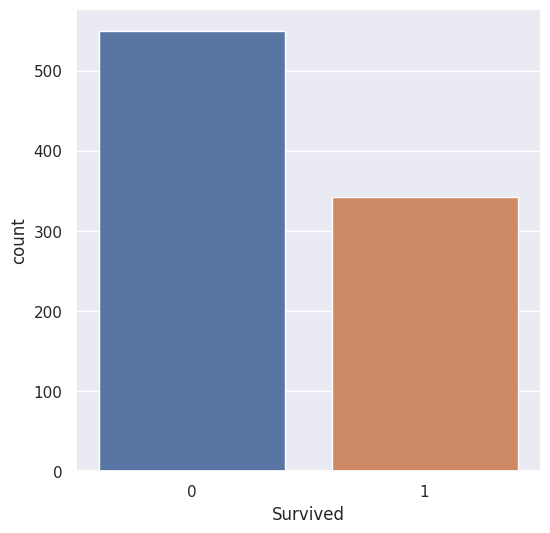

In [175]:
plt.figure(figsize=(6,6))
sns.countplot(x='Survived',data=dataset)
plt.show()

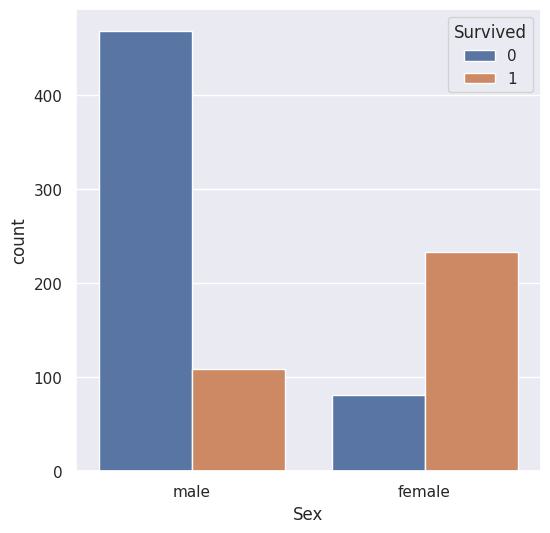

In [176]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex',hue='Survived',data=dataset)
plt.show()

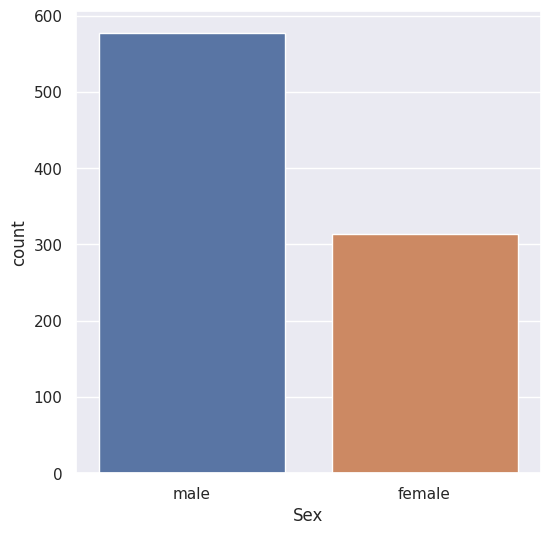

In [177]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex',data=dataset)
plt.show()

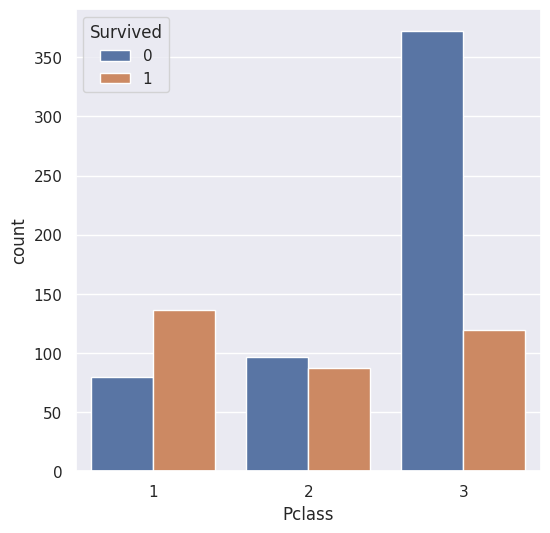

In [178]:
plt.figure(figsize=(6,6))
sns.countplot(x='Pclass',hue='Survived',data=dataset)
plt.show()

<ipython-input-179-4c6658d564d7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'])


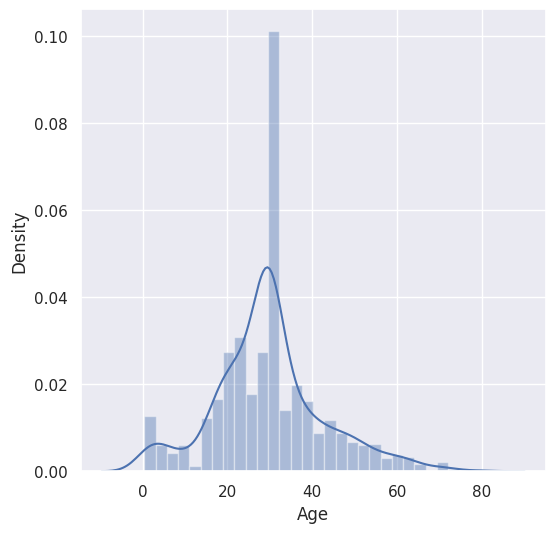

In [179]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['Age'])
plt.show()

In [180]:
dataset.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [181]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [182]:
x=dataset.drop(columns='Survived',axis=1)
y=dataset['Survived']

In [183]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         0
1         1    0  38.000000      1      0  71.2833         1
2         3    0  26.000000      0      0   7.9250         0
3         1    0  35.000000      1      0  53.1000         0
4         3    1  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         0
887       1    0  19.000000      0      0  30.0000         0
888       3    0  29.699118      1      2  23.4500         0
889       1    1  26.000000      0      0  30.0000         1
890       3    1  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [184]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [186]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [187]:
y_pred=y_pred.reshape(len(y_pred),1)

In [188]:
y_test_final=np.array(y_test)

In [189]:
y_test_final=y_test_final.reshape(len(y_test_final),1)

In [190]:
df=pd.DataFrame({'Actual':y_test_final.flatten(),'Predicted':y_pred.flatten()})

In [191]:
df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
174,1,1
175,0,0
176,1,1
177,0,0


In [192]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test_final,y_pred))

[[93 17]
 [18 51]]


In [193]:
print(accuracy_score(y_test_final,y_pred))

0.8044692737430168
